## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from bokeh.io import curdoc
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Select, DateRangeSlider, CheckboxGroup
from bokeh.layouts import column, row

## Load Dataset

In [5]:
df = pd.read_csv("ecommerce_sales.csv", parse_dates = ['Order_Date'])

# Add new columns for analysis:
df['Month'] = df['Order_Date'].dt.to_period("M").astype(str)
df['Year'] = df['Order_Date'].dt.year

## Matplotlib Exploration

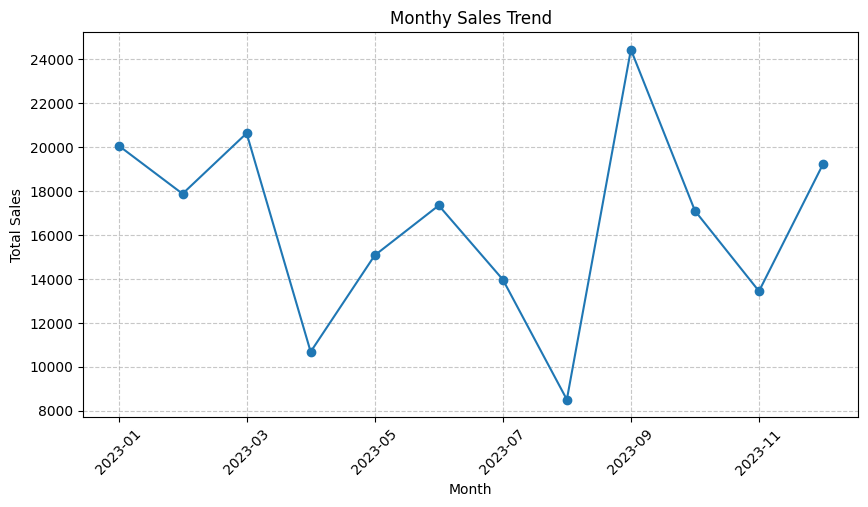

In [6]:
plt.figure(figsize = (10, 5))

monthly_sales = df.groupby("Month")['Sales'].sum()
monthly_sales.plot(kind = "line", marker = 'o')

plt.title("Monthy Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation = 45)

plt.grid(True, linestyle = "--", alpha = 0.7)
plt.show()

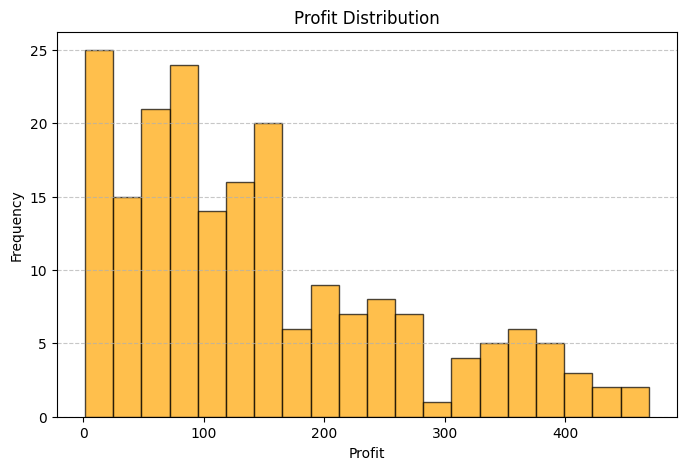

In [7]:
# Profit Distribution:

plt.figure(figsize = (8, 5))

df['Profit'].plot(kind = "hist", bins = 20, color = "orange", edgecolor = "black", alpha = 0.7)

plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

plt.show()

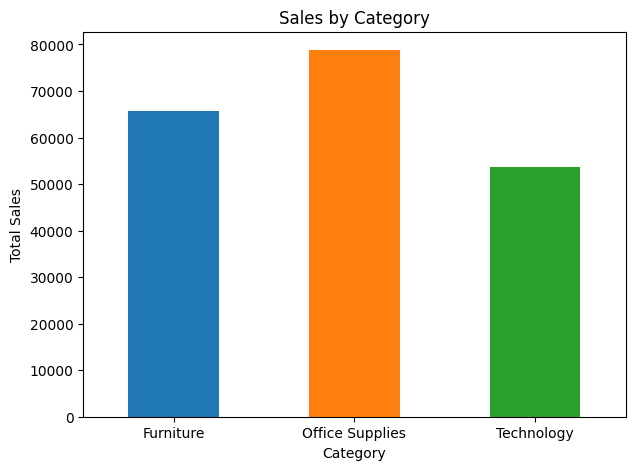

In [8]:
## Sales by Category:

plt.figure(figsize = (7, 5))
df.groupby("Category")['Sales'].sum().plot(kind = "bar", color = ["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.title("Sales by Category")
plt.ylabel("Total Sales")
plt.xticks(rotation = 0)
plt.show()

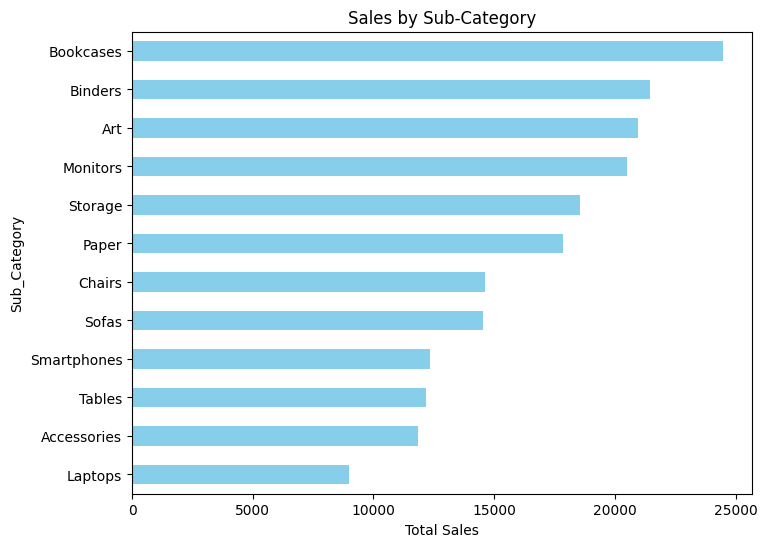

In [9]:
## Sales by Sub-Category (Horizontal Bar)

plt.figure(figsize = (8, 6))
df.groupby("Sub_Category")["Sales"].sum().sort_values().plot(kind = "barh", color = "skyblue")
plt.title("Sales by Sub-Category")
plt.xlabel("Total Sales")
plt.show()

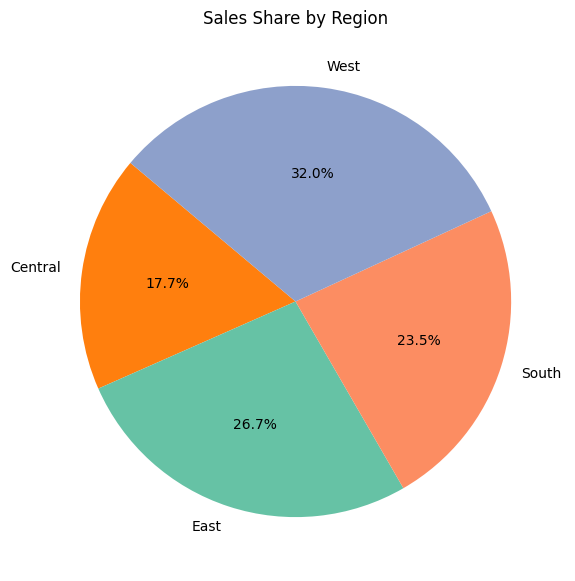

In [10]:
## Region-wise Sales (Pie Chart)

region_sales = df.groupby("Region")['Sales'].sum()
plt.figure(figsize = (7,7))
plt.pie(region_sales, labels = region_sales.index, autopct = "%1.1f%%", startangle = 140, colors = ["#ff7f0e", "#66c2a5","#fc8d62","#8da0cb"])
plt.title("Sales Share by Region")
plt.show()

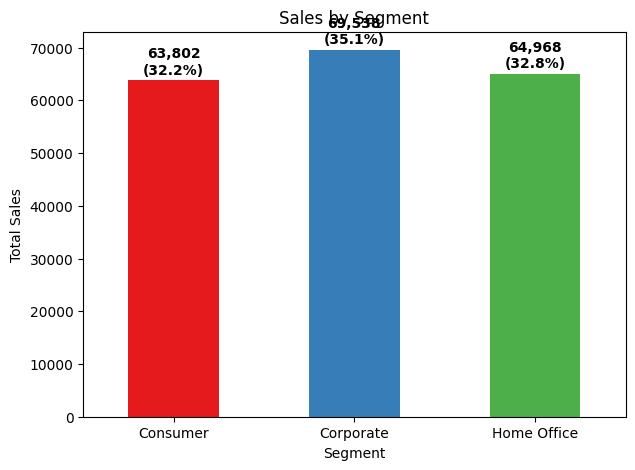

In [11]:
plt.figure(figsize=(7, 5))

# Create grouped data
seg_sales = df.groupby("Segment")["Sales"].sum()
total_sales = seg_sales.sum()

# Plot bar chart
bars = seg_sales.plot(
    kind="bar", 
    color=["#e41a1c", "#377eb8", "#4daf4a"]
)

# Title and labels
plt.title("Sales by Segment")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)

# Add values on top of bars
for i, value in enumerate(seg_sales):
    pct = (value / total_sales) * 100
    plt.text(
        i, value + (value * 0.01),                
        f"{value:,.0f}\n({pct:.1f}%)",            
        ha="center", va="bottom", 
        fontsize=10, fontweight="bold"
    )

plt.show()

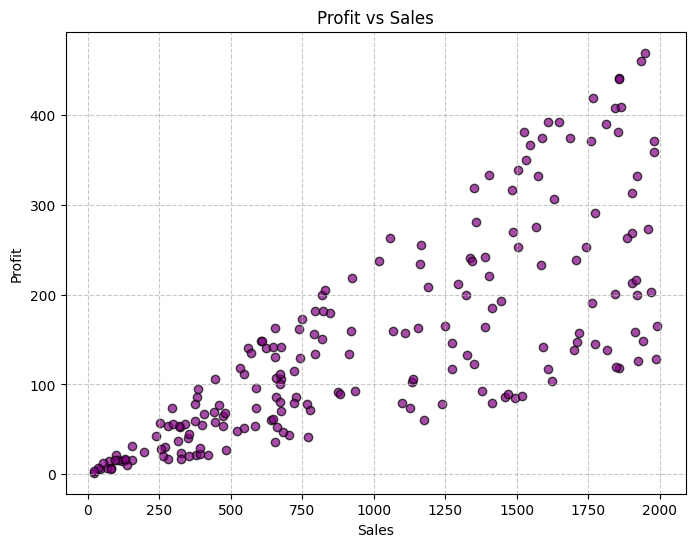

In [12]:
## Profit vs Sales:
plt.figure(figsize = (8, 6))
plt.scatter(df['Sales'], df['Profit'], c = "purple", alpha = 0.7, edgecolors = "black")
plt.title("Profit vs Sales")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.show()

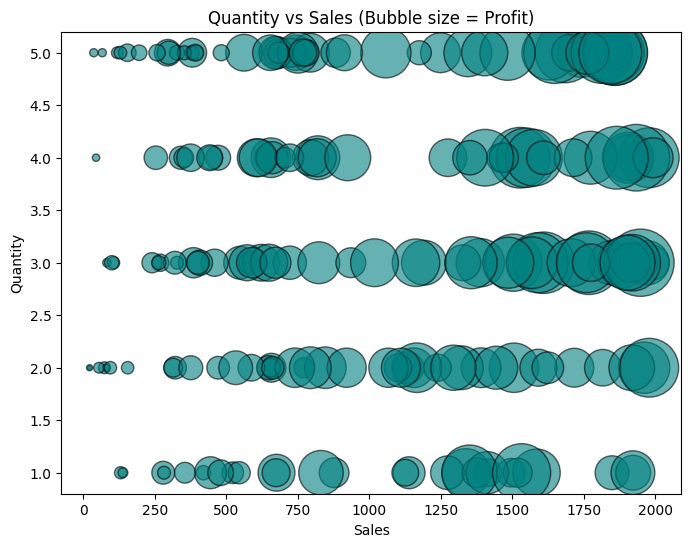

In [13]:
## Quantity vs Sales (Bubble Chart)

plt.figure(figsize = (8, 6))
plt.scatter(df['Sales'], df['Quantity'], s = df['Profit']*5, alpha = 0.6, c = "teal", edgecolors = "black")
plt.title("Quantity vs Sales (Bubble size = Profit)")
plt.xlabel("Sales")
plt.ylabel("Quantity")
plt.show()

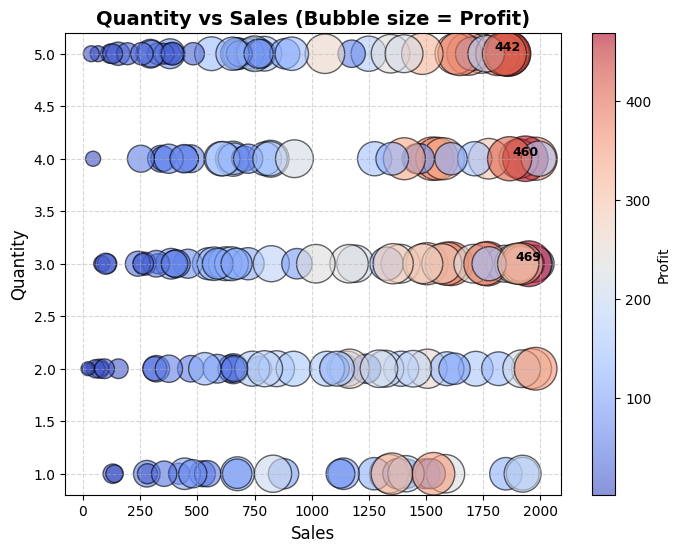

In [14]:
## Quantity vs Sales (Bubble Chart)

plt.figure(figsize = (8, 6))

# Bubble Sizes:
sizes = np.sqrt(np.abs(df["Profit"])) * 50  

scatter = plt.scatter(df['Sales'], 
                      df['Quantity'], 
                      s = sizes,
                      alpha = 0.6,
                      c = df['Profit'],      # color by Profit
                      cmap = "coolwarm",     # red = low/ negative, blue = high profit
                      edgecolors = "black")


plt.title("Quantity vs Sales (Bubble size = Profit)", fontsize = 14,
         fontweight = "bold")

plt.xlabel("Sales", fontsize = 12)
plt.ylabel("Quantity", fontsize = 12)

# Grid:
plt.grid(True, linestyle = '--', alpha = 0.5)

# Colorbar for Profit:
cbar = plt.colorbar(scatter)
cbar.set_label("Profit")

# Highlight top 3 high-profit points:
top3 = df.nlargest(3, "Profit")
for i, row in top3.iterrows():
    plt.text(row["Sales"], row["Quantity"], f"{row['Profit']:.0f}", 
             fontsize=9, fontweight="bold", ha="center", va="bottom")

plt.show()

## Category wise profitability

<Figure size 800x600 with 0 Axes>

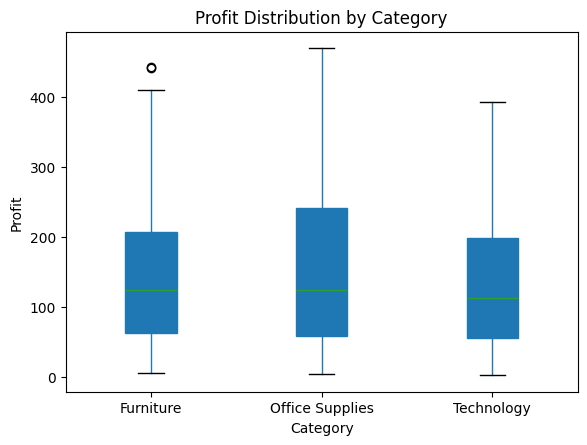

In [15]:
plt.figure(figsize = (8, 6))
df.boxplot(column = "Profit", by = "Category", grid = False, patch_artist = True)

plt.title("Profit Distribution by Category")
plt.suptitle("")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

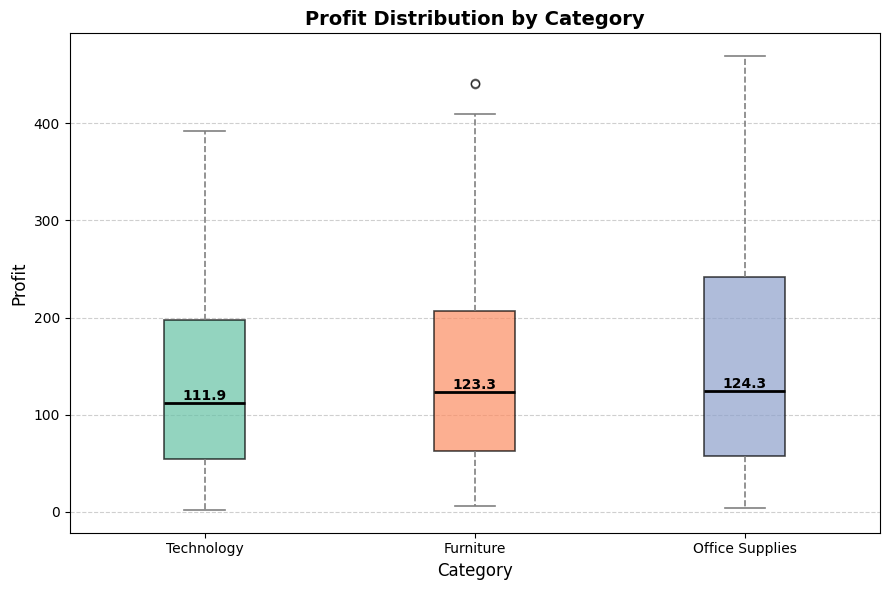

In [16]:
median_order = df.groupby("Category")["Profit"].median().sort_values().index
data_sorted = [df.loc[df["Category"] == cat, "Profit"] for cat in median_order]

plt.figure(figsize=(9,6))

# Custom colors for each box
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3", "#a6d854"]  
box = plt.boxplot(
    data_sorted, 
    patch_artist=True,  # allow facecolor
    labels=median_order, 
    showfliers=True
)

# Apply colors to each box
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
    patch.set_edgecolor("black")
    patch.set_linewidth(1.2)

# Style medians, whiskers, caps
for median in box['medians']:
    median.set(color="black", linewidth=2)

for whisker in box['whiskers']:
    whisker.set(color="gray", linewidth=1.2, linestyle="--")

for cap in box['caps']:
    cap.set(color="gray", linewidth=1.2)

for flier in box['fliers']:
    flier.set(marker='o', color="red", alpha=0.6)

# Grid & labels
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.title("Profit Distribution by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Profit", fontsize=12)

# Annotate median values
medians = [np.median(vals) for vals in data_sorted]
for i, median in enumerate(medians, start=1):
    plt.text(i, median, f"{median:.1f}", 
             ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

## Plotly Interactive Visualization

In [24]:
import plotly.express as px
import plotly.graph_objects as go

In [26]:
fig1 = px.bar(
df,
    x = "Region",
    y = "Sales",
    color = "Category",
    barmode = "stack",
    text_auto = ".2s",
    title = "Sales by Region and Category",
    color_discrete_sequence = px.colors.qualitative.Pastel
)

fig1.update_layout(
xaxis_title = "Region",
yaxis_title = "Total Sales",
    legend_title = "Category",
    template = "plotly_white"
)

fig1.show()

In [27]:
fig2 = px.pie(
df,
    names = "Segment",
    values = "Sales",
    title = "Sales Contribution by Customer Segment",
    color_discrete_sequence = px.colors.sequential.RdBu,
    hole = 0.3
)

fig2.update_traces(textinfo = "percent+label", pull = [0.05, 0.05, 0.05])
fig2.show()

In [28]:
fig3 = px.scatter(
df,
    x = "Sales",
    y = "Profit",
    size = "Quantity",
    color = "Category",
    hover_data = ["Product_Name", "Region", "Segment"],
    title = "Sales vs Profit vs Quantity (Bubble = Quantity)",
    size_max = 30,
    color_discrete_sequence = px.colors.qualitative.Bold
)

fig3.show()

In [29]:
## Heatmap - Sales by Region & Category

heatmap_data = df.pivot_table(
index = "Region", columns = "Category", values = "Sales", aggfunc = "sum"
).fillna(0)


fig4 = px.imshow(
heatmap_data,
    text_auto = ".2s",
    color_continuous_scale = "Viridis",
    aspect = "auto",
    title = "Heatmap: Sales by Region & Category"
)

fig4.show()

In [30]:
## Linechart - Monthly Sales Trend

monthly_sales = df.groupby("Month", as_index = False)['Sales'].sum()

fig5 = px.line(
monthly_sales,
    x = "Month",
    y = "Sales",
    title = "Monthly Sales Trend",
    markers = True,
    line_shape = "spline",
    color_discrete_sequence = ["#1f77b4"]
)

fig5.show()

In [31]:
## Facet Chart - Profit by Category across Regions

fig6 = px.bar(
df,
    x = "Category",
    y = "Profit",
    color = "Category",
    facet_col = "Region",
    title = "Profit Comparision by Category and Region"
)

fig6.show()

In [34]:
## Animated Scatter

fig7 = px.scatter(
df,
    x = "Sales",
    y = "Profit",
    animation_frame = "Month",
    color = "Region",
    size = "Quantity",
    hover_data = ["Product_Name", "Category"],
    title = "Animated Sales vs Profit Over Time"
)

fig7.show()

In [47]:
from bokeh.io import curdoc
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Select, DateRangeSlider, CheckboxGroup
from bokeh.layouts import column, row


source = ColumnDataSource(df)

# Time-series Sales Trend:
p1 = figure(x_axis_type = "datetime", title = "Sales Trend", width = 600, height = 300)
p1.line("Order_Date", "Sales", source = source, line_width = 2, color = "navy")

top_products = df.groupby("Product_Name")["Sales"].sum().nlargest(10).reset_index()
p2 = figure(x_range = top_products["Product_Name"], title = "Top 10 Products by Sales",
           width = 600, height = 300)
p2.vbar(x = top_products["Product_Name"], top = top_products['Sales'],
       width = 0.6, color = "green")
p2.xaxis.major_label_orientation = 1

#Scatter plot
p3 = figure(title = "Sales vs Profit", width = 600, height = 300)
p3.circle("Sales", "Profit", source = source, size = 8, color = "orange", alpha = 0.6)

# Create Interactive widget:
region_select = Select(title = "Select Region:",
                      value = "East", options = df["Region"].unique().tolist())
category_check = CheckboxGroup(labels = df["Category"].unique().tolist(),
                              active = list(range(len(df["Category"].unique()))))
date_slider = DateRangeSlider(title = "Date Range", start = df['Order_Date'].min(),
                             end = df["Order_Date"].max(),
                             value = (df["Order_Date"].min(), 
                                     df["Order_Date"].max()))
# Update Function:
def update(attr, old, new):
    selected_region = region_select.value
    selected_categories = [category_check.labels[i] for i in category_check.active]
    start_date, end_date = date_slider.value_as_datetime
    
    filtered = df[(df["Region"] == selected_region) &
                 (df["Category"].isin(selected_categoriesries)) &
                 (df['Order_Date'] >= start_date) &
                 (df['Order_Date'] <= end_date)]
    source.data = ColumnDataSource(filtered).data

#Link Widgets to the Update Function
region_select.on_change("value", update)
category_check.on_change("active", update)
date_slider.on_change("value", update)

# Create Dashboard Layout:
layout = column(row(region_select, category_check), date_slider, p1, p2, p3)
curdoc().add_root(layout)
